# Labeled latent Dirichlet allocation (L-LDA) in WebPPL

In [1]:
import os
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt
from matplotlib import font_manager
from matplotlib import cm
from wordcloud import WordCloud
avenir = "visuals/Avenir.ttf"

## Distribution of words in each topic

In [2]:
df = pd.read_csv("lda/llda_example_5docs_10000samp_100burn_5lag_wordDistForTopic.csv", index_col=0, header=None)
df.head()

,1,2
0,,
auditory,0.115555,0.035701
hearing,0.302476,0.668986
language,0.256673,0.217600
speech,0.325296,0.077714


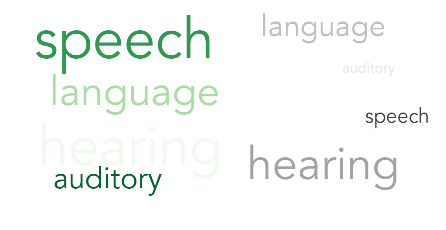

In [3]:
# Initialize plot
fig, axs = plt.subplots(1, 2, figsize=(6, 3))
axs = axs.ravel()
cms = [cm.Greens, cm.Greys]
for i in range(1,len(df.columns)+1):
    vals = [int(val*100) for val in df[i]]
    words = {word: vals[j] for j, word in enumerate(df.index)}
    wordcloud = WordCloud(width=450, height=450,
                          prefer_horizontal=1,
                          max_words=len(df),
                          background_color="white", 
                          font_path=avenir,
                          colormap=cms[i-1],
                          min_font_size=12).generate_from_frequencies(words)                     
    axs[i-1].imshow(wordcloud) 
    axs[i-1].axis("off")

# Export plot
plt.tight_layout(pad=0)
plt.savefig("visuals/llda_wordsByTopic.png", bbox_inches="tight", dpi=250)
plt.show() 

## Distribution of topics in each document

In [4]:
df = pd.read_csv("lda/llda_example_5docs_10000samp_100burn_5lag_topicDistForDoc.csv", index_col=None, header=None)
df

,0,1
0,0.006309,0.993691
1,0.167111,0.832889
2,0.896886,0.103114
3,0.676162,0.323838
4,0.047457,0.952543


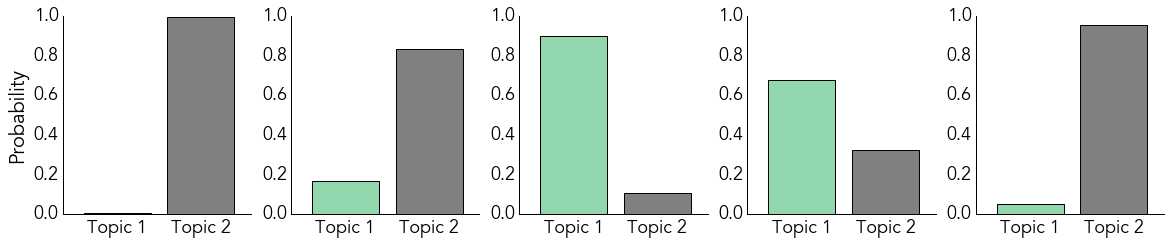

In [5]:
# Initialize plot
fig, axs = plt.subplots(1, 5, figsize=(16, 3.5))
axs = axs.ravel()
font_labels = font_manager.FontProperties(fname=avenir, size=20)
font_ticks = font_manager.FontProperties(fname=avenir, size=18)    

# Iterate over documents
for i in range(len(df)):

    # Plot data
    axs[i].bar([0,1], df.loc[i], color=["#91d6ad", "gray"])

    # Style
    for label in axs[i].get_xticklabels():
        label.set_fontproperties(font_ticks)
    for label in axs[i].get_yticklabels():
        label.set_fontproperties(font_ticks)
    axs[i].set_xlim([-0.25,2])
    axs[i].set_ylim([0,1])
    axs[i].spines["right"].set_visible(False)
    axs[i].spines["top"].set_visible(False)
    axs[i].set_xticks([0.4,1.4])
    axs[i].set_xticklabels(("Topic 1", "Topic 2"))
    axs[i].tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False) 

# Style plot
plt.tight_layout()
axs[0].set_ylabel("Probability", fontproperties=font_labels)

# Export
plt.savefig("visuals/llda_topicsbyDoc.png", bbox_inches="tight", dpi=250)
plt.show()

## Perplexity over the number of MH samples

In [6]:
df = pd.read_csv("lda/llda_example_perplexity.csv", index_col=None, header=None)
df.columns = ["SAMPLES", "PERPLEXITY"]
df = df[:(11*100)]
df = df.loc[df["SAMPLES"] > 50]
len(df)

700

In [11]:
df_lda = pd.read_csv("lda/lda_example_perplexity.csv", index_col=None, header=None)
df_lda.columns = ["SAMPLES", "PERPLEXITY"]
df_lda = df_lda.loc[df_lda["SAMPLES"] > 50]
len(df_lda)

7000

In [12]:
# T-tests at each number of samples
from scipy.stats import ttest_ind
from collections import OrderedDict
n_samps = list(OrderedDict.fromkeys(df["SAMPLES"]))
for n_samp in n_samps:
    ttest = ttest_ind(df.loc[df["SAMPLES"] == n_samp, "PERPLEXITY"], 
                      df_lda.loc[df_lda["SAMPLES"] == n_samp, "PERPLEXITY"])
    print(ttest.pvalue * len(n_samps))

4.310868545403659e-17
1.2068773970312805e-85
1.9402556685496164e-95
8.138018509782483e-154
4.210361374007334e-239
6.801775942545092e-243
6.056472129322089e-228


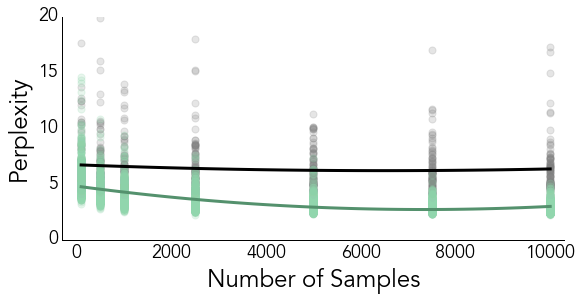

In [13]:
# Initialize figure
fig = plt.figure(figsize=[9, 4])

# Plot data from simple and marginalized implementations
plt.scatter(df["SAMPLES"], df["PERPLEXITY"], color="gray", alpha=0.2, s=50)
plt.scatter(df_lda["SAMPLES"], df_lda["PERPLEXITY"], color="#91d6ad", alpha=0.2, s=50)

# Fit curves
z = np.polyfit(df["SAMPLES"], df["PERPLEXITY"], 2)
f = np.poly1d(z)
x_new = np.linspace(100, 10000, 50)
y_new = f(x_new)
plt.plot(x_new, y_new, color="k", linewidth=3)
z = np.polyfit(df_lda["SAMPLES"], df_lda["PERPLEXITY"], 2)
f = np.poly1d(z)
x_new = np.linspace(100, 10000, 50)
y_new = f(x_new)
plt.plot(x_new, y_new, color="#54916d", linewidth=3)

# Style
font_labels = font_manager.FontProperties(fname=avenir, size=24)
font_ticks = font_manager.FontProperties(fname=avenir, size=18)
plt.xlabel("Number of Samples", fontproperties=font_labels)
plt.ylabel("Perplexity", fontproperties=font_labels)
plt.xticks(fontproperties=font_ticks)
plt.yticks(fontproperties=font_ticks)
plt.xlim([-300,10300])
plt.ylim([0,20])
ax = plt.subplot(111)
ax.spines["right"].set_visible(False)
ax.spines["top"].set_visible(False)
plt.tick_params(axis='both', which='both', bottom=False, top=False, left=False, right=False) 

# Export
plt.savefig("visuals/llda_perplexity.png", bbox_inches="tight", dpi=250)
plt.show()